In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [2]:
#load the dataset
breast_cancer_data = load_breast_cancer()

In [3]:
#check the type
type(breast_cancer_data)

sklearn.utils.Bunch

In [4]:
#check keys
breast_cancer_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
#check feature_names and target_names
print("feature_names: {}".format(breast_cancer_data["feature_names"]))
print("target_names: {}".format(breast_cancer_data["target_names"]))

feature_names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
target_names: ['malignant' 'benign']


In [10]:
#get the train data and labels
#convert numpy array to pandas dataframe
X = pd.DataFrame(breast_cancer_data["data"], columns=breast_cancer_data["feature_names"])
y = pd.Series(breast_cancer_data["target"])             

In [11]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [14]:
#check the null value
#X.isnull().sum()

In [15]:
#check the X types
#X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

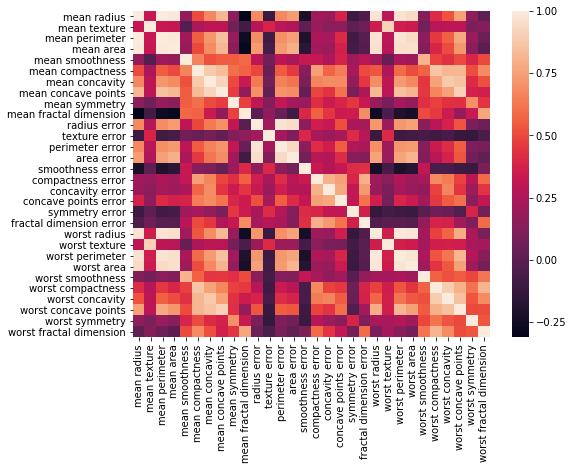

In [18]:
#heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(X.corr(), ax=ax);

In [26]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [27]:
X_test.shape

(143, 30)

In [83]:
#logistic regression
lr = LogisticRegression(penalty="l1", C=10, solver='liblinear')
lr.fit(X_train, y_train)
print("score on train set: {}".format(lr.score(X_train, y_train)))
print("score on test set: {}".format(lr.score(X_test, y_test)))

score on train set: 0.9741784037558685
score on test set: 0.972027972027972


In [84]:
lr.coef_[0]

array([ 8.04918184e-01,  2.14371164e-02,  1.04673750e-01, -4.91638556e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.10963079e+00,
       -4.56782279e-01, -1.03124529e-01,  0.00000000e+00,  0.00000000e+00,
        6.95562953e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.50985729e-01, -3.29303335e-01,  1.47756534e-02, -1.99174219e-02,
        0.00000000e+00,  0.00000000e+00, -2.70533291e+00, -3.68984253e+01,
       -8.39045601e+00,  0.00000000e+00])

In [85]:
lr.intercept_

array([11.47348536])

In [86]:
X_selected = X.loc[:, lr.coef_[0] != 0]

In [87]:
X_selected.shape

(569, 15)

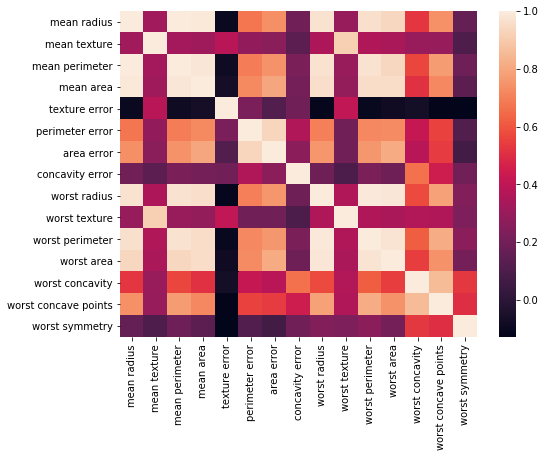

In [88]:
#heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(X_selected.corr(), ax=ax);